<a href="https://colab.research.google.com/github/rafiag/DTI2020/blob/main/002b_Multi_Linear_Regression_(ID).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pembukaan**

# **Regresi Linear Berganda menggunakan Python**

*oleh: Rafi Atha Ganiza*

---

Notebook ini dibuat untuk mendemonstrasikan cara melakukan regresi linear berganda menggunakan Python. Analisis regresi sendiri adalah alat untuk membuat model statistika yang dapat menjelaskan hubungan antara variabel terikita dengan satu atau lebih variabel bebas. **Regresi Linear Sederhana** adalah metode yang digunakan ketika hanya terdapat satu variabel bebas, sedangkan **Regresi Linear Berganda** merupakan metode yang digunakan ketika jumlah variabel bebas lebih dari satu. Model Regresi Linear Berganda dapat dituliskan ke dalam persamaan di bawah ini:

<div align="center">
$\hat{y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{k}X_{k}$
</div>

*di mana:*

*$\hat{y}:$ dependent variable (predicted value)*

*$\beta_{0}:$ estimated intercept*

*$\beta_{k}X_{k}:$ estimated slope coefficient*

Pada contoh ini kita akan mencoba menggunakan regresi linear bergand untuk menganalisis hubungan antara harga jual sebuah produk, biaya iklan, dan tingkat penjualan produk tersebut. Kita juga akan mencoba untuk memprediksi berapa banyak produk berdasarkan harga produk dan biaya iklan tertentu.

# Persiapan

Pada *cell* kode di bawah kita akan memuat *libraries* Python yang akan kita gunakan, seperti Pandas, NumPy, matplotlib, sklearn, dll. Kita juga akan memuat data kita dari GitHub ke dalam *dataframe* bernama `df_pie` menggunakan *library* Pandas.

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv', 
                     index_col='week', sep=';')

print(df_pie.shape)
df_pie

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


Seperti terlihat di atas data kita memiliki 3 kolom (*pie_sales, price, and advertising*) dan 15 baris. Kita akan mencoba untuk memprediksi jumlah pie yang terjual berdasarkan harga jualnya dan biaya iklan yang dikerluarkan.

# Analisis Deskriptif

Sebelum melanjutkan lebih dalam ke regresi linear berganda, akan lebih baik jika kita mencoba menampikan data kita dan melihat apakah ada hubungan antar tiap variabel. Untuk melakukan ni kita bisa menggunakan fungsi `pairplot()` dari *library* Seaborn. Fungsi tersbut akan menghasilkan grafik yang terdiri dari histogram dan *scatter plot* yang menggambarkan hubungan antar variabel secara sederhana.

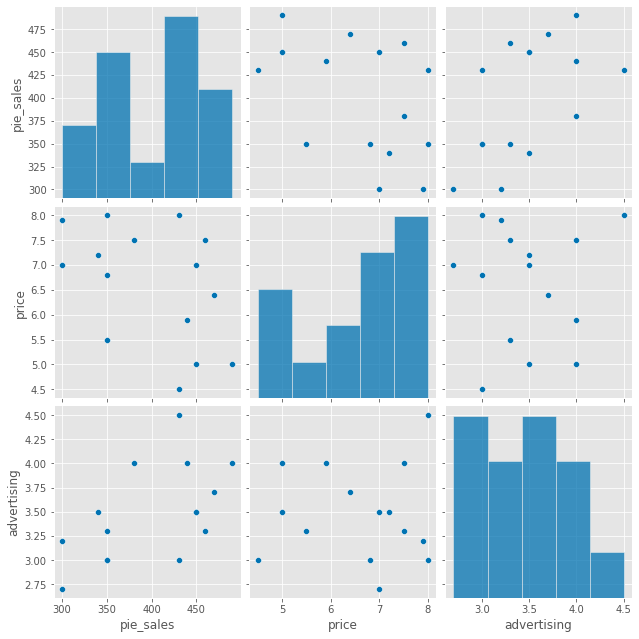

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

Pada baris pertama grafik tersebut kita dapat melihat bahwa ada kemungkinan terdapat hubungan antara *price, advertising,* dan *pie_sales*. *Scatter plot* antara penjualan pie dan harga menunjukan hubungan negatif, artinya semakin tinggi harga pie maka semakin rendah jumlah pie yang terjual. Sedangkan, pada *scatter plot* antara biaya iklan dan penjualan pie menunjukan hubungan positif, semakin tinggi biaya iklan yang dikeluarkan maka semakin banyak pie yang akan terjual.

# Membuat Model Regresi

Karena kita sudah melihat bahwa mungkin ada hubungan antara variabel independen dan dependen, kita dapat melanjutkan dengan membangun model regresi kita. Kita akan menggunakan fungsi `LinearRegression ()` dari *library* sklearn untuk membangun model kita.

In [ ]:
# Set independent and dependent variables
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 306.5261932837436
Coefficients: [-24.97508952  74.13095749]


Kode di atas mencetak beberapa angka penting dari model kita. Angka-angka tersebut adalah nilai *intercept* dan *coefficients* dari model kita yang dapat dituliskan ke dalam persamaan berikut:

<div align="center"> $\hat{y} = 306.5261 - 24.975X_{1} + 74.1309X_{2}$ </div>

Mari kita bahas angka tersebut satu per satu:

*   Nilai *intercept* merupakan perkiraan nilai rata-rata dari variabel terikita kita ketika semua variabel bebas memiliki nilai 0. Dalam kasus ini hal tersebut berarti jika kita menjual pie seharga 0 dan mengeluarkan biaya iklan sebesar 0 maka kita akan menjual 306 pie.
*   Pada bagian *coefficients* kita memiliki 2 nilai, yaitu untuk variabel *price* dan *advertising*. Nilai ini menggambarkan hubungan variabel bebas terhadap variabel terikita yang kita miliki, di mana perubahan sebesar 1 pada variabel bebas akan merubah nilai dari variabel terikat sebesar nilai *coefficient* tersebut. Misalkan, jika kita meningkatkan biaya iklan sebesar 10 maka kita juga akan meningkatkan penjualan sebanyak 741 pi (74.1309 * 10).

Selanjutnya kita akan mencoba memprediksi jumlah pie yang akan kita jual dengan memasukan data yang kita mau...

In [ ]:
# Values to predict
price = input('Berapa harga pie yang akan kita jual? \n')
advertising = input('Berapa biaya iklan yang akan kita keluarkan? \n')

try:
    print('Kita dapat memperkirakan penjualan sebanyak {:.0f} pie jika kita menjual pie seharaga {} dan mengeluarkan biaya iklan sebesar {}.'.format(
        model.predict([[float(price), float(advertising)]])[0],
        price, 
        advertising))
except ValueError:
    print('Pastikan anda hanya memasukan input berupa:\n- bilangan bulat, misalnya 1, 4, atau 7\n- bilangan decimal, misalnya 3.8 (menggunakan . (titik) bukan , (koma)')

Berapa harga pie yang akan kita jual? 
3
Berapa biaya iklan yang akan kita keluarkan? 
6.5
Kita dapat memperkirakan penjualan sebanyak 713 pie jika kita menjual pie seharaga 3 dan mengeluarkan biaya iklan sebesar 6.5.


Sebelum melanjutkan ke langkah berikutnya kita akan mencoba memvisualisasikan model kita ke dalam bentuk grafik 3 dimensi dengan kode di bawah. Kita akan menggambarkan model linear kita sebagai bidang berwarna biru dan kita juga akan menggambarkan data observasi kita ke dalam titik abu-abu.

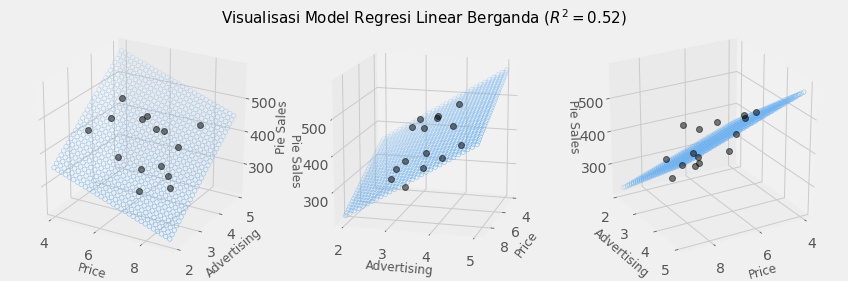

In [ ]:
# Prepare data
X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(4, 9, 30)  # range of price values
yy_pred = np.linspace(2, 5, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Visualisasi Model Regresi Linear Berganda ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

Berikut adalah tampilan 360° dari visualisasi model tersebut:

<div align="center">
<img src="https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/images/Multi-Linear%20Regression%20Model%20Visualization.gif" height='300'><br>
<a href='https://github.com/rafiag/DTI2020/blob/main/images/Multi-Linear%20Regression%20Model%20Visualization.gif'>Klik disini jika gambar gagal dimuat.</a>
<div>

# Validasi Model

Setelah berhasil membangun model, penting bagi kita untuk memvalidasi performanya. Suatu model dapat dievaluasi dengan melihat koefisien determinasi ($R^2$), F-test, t-test, dan juga residualnya. Sebelum melanjutkan, kita akan membangun ulang model kita menggunakan library statsmodel dengan fungsi `OLS()`. Kemudian kita akan menampilkan ringkasan model menggunakan fungsi `summary ()` pada model. Ringkasan model tersebut berisi banyak nilai penting yang dapat kita gunakan untuk mengevaluasi model kita.

In [ ]:
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 24 Oct 2020   Prob (F-statistic):             0.0120
Time:                        16:12:07   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

## *Coefficient of Determination* ($R^2$)

*Coefficient of determination* adalah porsi dari nilai variabel bebas yang dapat dijelaskan menggunakan variasi variabel terikat yang kita miliki. Skor $R^2$ dihitung sebagai berikut:

<div align="center"> $R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2}$ </div>

Pada statsmodel kita dapat mendapatkan nilai $R^2$ dari model kita dengan mengakses atribut `.rsquared` dari model kita.

In [ ]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.5214779360292285


$R^2$ berada di antara 0 dan 1, dimana $R^2=0$ berarti tidak ada hubungan linier antara variabel dan $R^2=1$ menunjukkan hubungan linier yang sempurna. Dalam kasus ini kita mendapat skor $R^2$ sebesar 0,5214 yang berarti 52,14% dari variabel terikat kita dapat dijelaskan menggunakan variabel bebas yang ada.

## F-test (ANOVA)

F-test or ANOVA (Analysis of variance) dalam regresi berganda dapat digunakan untuk menentukan apakah model kompleks yang ktia buat kita memiliki kinerja yang lebih baik daripada model yang lebih sederhana (misalnya model dengan hanya satu variabel independen). Dengan F-test kita dapat mengevaluasi signifikansi model kita dengan menghitung kemungkinan mengamati F-statistic yang setidaknya setinggi nilai yang diperoleh model kita. Mirip dengan skor $R^2$, kita bisa dengan mudah mendapatkan F-statistic dan probabilitas F-statistic tersebut dengan mengakses atribut `.fvalue` dan` .f_pvalue` dari model kita seperti di bawah ini.

In [ ]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 6.538606789020464
Probability of observing value at least as high as F-statistic: 0.01200637223318641


Karena nilai f_pvalue kita lebih rendah dari 0.05, **kita dapat menyimpulkan bahwa model kita memiliki performa yang lebih baik dibanding model lain yang lebih sederhana.**

## T-test

The t-statistic adalah koefisien variabel dibagi dengan *standard error*-nya. *Standard error* adalah perkiraan deviasi dari koefisien tersebut, jumlahnya bervariasi di setiap kasus. Ini dapat dianggap sebagai ukuran ketepatan yang digunakan untuk mengukur koefisien pada model regresi. Sama seperti F-test, p-value menunjukkan probabilitas atau kemungkinan kita melihat hasil yang ekstrim seperti model yang kita miliki. Kita juga bisa mendapatkan p-value untuk semua variabel kita dengan memanggil atribut `.pvalues` pada model yang telah kita buat.

In [ ]:
print(olsmod.pvalues)

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64


Kedua variabel bebas kita, *price* dan *advertising*, memiliki p-value kurang dari 0.05 yang menunjukan bahwa **ada cukup bukti bahwa harga dan biaya iklan mempengaruhi penjualan pie kita.**

## Uji Asumsi Klasik

Selanjutnya kita akan memvalidasi model kita dengan melakukan analisis residual, berikut adalah uji asumsi klasik yang akan kita lakukan untuk mengecek validitas model kita:

1. Linearitas
2. Normalitas
3. Multikolinieritas
4. Autokorelasi
5. Homoskedastisitas

Residual adalah selisih antara nilai observasi dan nilai prediksi dari dataset yang kita miliki. Dengan statsmodel kita bisa dengan mudah mendapatkan nilai residual dari model kita dengan mengakses atribut `.resid` dari model dan kemudian kita bisa menyimpannya di kolom baru bernama 'residual' di dataframe` df_pie` kita.

In [ ]:
df_pie['pie_sales_pred'] = olsmod.predict(X)
df_pie['residual'] = olsmod.resid
df_pie.head()

,pie_sales,price,advertising,pie_sales_pred,residual
week,,,,,
1,350,5.5,3.3,413.795361,-63.795361
2,460,7.5,3.3,363.845182,96.154818
3,350,8.0,3.0,329.118350,20.881650
4,430,8.0,4.5,440.314786,-10.314786
5,350,6.8,3.0,359.088457,-9.088457


### Linearitas

Uji asumsi ini untuk memastikan bahwa terdapat hubungan linier antara variabel bebas dan variabel terikat. Dalam kasus ini karena kita memiliki beberapa variabel independen, kita dapat melakukan uji asumsi ini dengan menggunakan *scatter plot* untuk menggambarkan hubungan antara nilai prediksi dan nilai observasi sebenarnya.

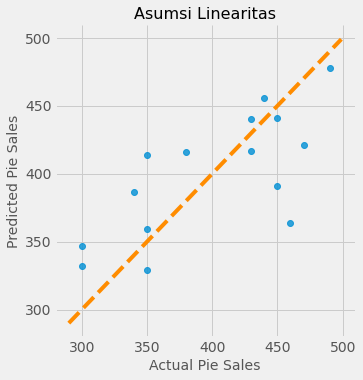

In [ ]:
# Plotting the observed vs predicted values
sns.lmplot(x='pie_sales', y='pie_sales_pred', data=df_pie, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_pie[['pie_sales', 'pie_sales_pred']].min().min()-10, 
                        df_pie[['pie_sales', 'pie_sales_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Pie Sales', fontsize=14)
plt.xlabel('Actual Pie Sales', fontsize=14)
plt.title('Asumsi Linearitas', fontsize=16)
plt.show()
plt.show()

Hasil *scatter plots* menunjukkan titik residual yang tersebar merata di sekitar garis diagonal, sehingga kita dapat mengasumsikan bahwa **terdapat hubungan linier antara variabel independen dan dependen.**

### Normalitas

Uji asumsi ini untuk memastikan bahwa kesalahan model terdistribusi normal. Kita akan memeriksa normalitas residual dengan memplotnya ke dalam histogram dan melihat p-value dari uji normalitas Anderson-Darling. Kita akan menggunakan fungsi `normal_ad ()` dari statsmodel untuk menghitung p-value kita dan kemudian membandingkannya dengan batasan 0,05, jika p-value yang kita dapatkan lebih tinggi dari batasan tersebut maka kita dapat mengasumsikan bahwa residual kita terdistribusi normal.

p-value dari tes Anderson-Darling di bawah 0.05 dapat dianggap tidak normal: 0.6655438857701688


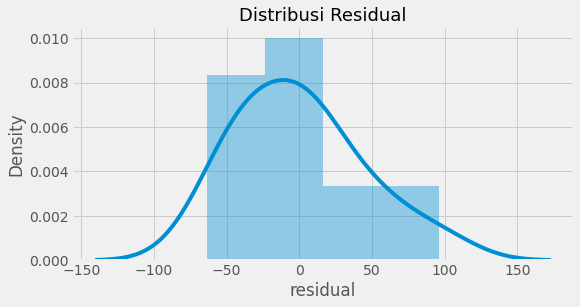

Residual terdistribusi dengan normal


In [ ]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_pie['residual'])[1]
print('p-value dari tes Anderson-Darling di bawah 0.05 dapat dianggap tidak normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribusi Residual', fontsize=18)
sns.distplot(df_pie['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residual tidak terdistribusi dengan normal')
else:
    print('Residual terdistribusi dengan normal')

Dari kode di atas didapatkan p-value sebesar 0.6644 yang dapat dikatakan normal karena berada di atas ambang batas 0.05. Plot histogram juga menunjukkan distribusi normal (meskipun mungkin terlihat sedikit miring karena kita hanya memiliki 15 observasi dalam dataset kita). **Dari kedua hasil tersebut kita dapat berasumsi bahwa residual kita terdistribusi secara normal.**

### Multikolinieritas

Uji asumsi ini untuk memastikan bahwa prediktor atau variabel bebas yang digunakan dalam regresi tidak berkorelasi satu sama lain. Untuk mengidentifikasi apakah ada korelasi antara prediktor, kita dapat menghitung koefisien korelasi Pearson antara setiap kolom dalam data kita menggunakan fungsi `corr ()` dari Pandas *dataframe*. Kemudian kita bisa menampilkannya sebagai *heatmap* menggunakan fungsi `heatmap ()` dari Seaborn.

Matrix Pearson correlation coefficient antar tiap variabel:
              pie_sales     price  advertising
pie_sales     1.000000 -0.443273     0.556320
price        -0.443273  1.000000     0.030438
advertising   0.556320  0.030438     1.000000


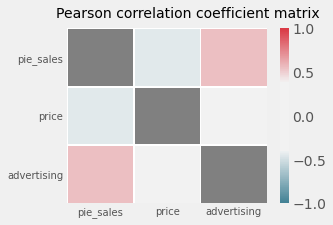

In [ ]:
corr = df_pie[['pie_sales', 'price', 'advertising']].corr()
print('Matrix Pearson correlation coefficient antar tiap variabel:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

Gambar di atas menunjukkan bahwa ada hubungan positif antara biaya iklan dan penjualan pie serta hubungan negatif antara harga dan penjualan pie. Kedua hasil ini mendukung model yang telah kita hasilkan sebelumnya. Yang paling penting, perhatikan bagaimana harga dan iklan memiliki koefisien korelasi hampir 0. **Ini berarti kedua variabel bebas kita tidak saling memengaruhi dan tidak ada multikolinieritas dalam data kita.**

### Autokorelasi

Autokorelasi digunakan ketika data dikumpulkan dari waktu ke waktu untuk mendeteksi apakah ada autokorelasi. Autokorelasi terjadi jika residual dalam satu periode waktu terkait dengan residual di periode lain. Kita dapat mendeteksi autokorelasi dengan melakukan uji Durbin-Watson untuk menentukan apakah ada korelasi positif atau negatif. Pada langkah ini kita akan menggunakan fungsi `durbin_watson ()` dari statsmodel untuk menghitung nilai Durbin-Watson kita dan kemudian memeriksa nilainya dengan kriteria berikut:

*   Jika nilai Durbin-Watson kurang dari 1,5 maka ada hubungan autokorelasi positif dan asumsi tidak terpenuhi
*   Jika nilai Durbin-Watson berada di antara 1,5 dan 2,5 maka tidak ada hubungan autokorelasi dan asumsi terpenuhi
*   Jika nilai Durbin-Watson lebih dari 2,5 maka ada hubungan autokorelasi negatif dan asumsi tidak terpenuhi

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_pie['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Terdapat tanda terjadinya autokorelasi positif', '\n')
    print('Asumsi tidak terpenuhi')
elif durbinWatson > 2.5:
    print('Terdapat tanda terjadinya autokorelasi negatif', '\n')
    print('Asumsi tidak terpenuhi')
else:
    print('Kemungkinan terjadinya autokorelasi tidak signifikan', '\n')
    print('Asumsi terpenuhi')

Durbin-Watson: 1.6831203020921253
Kemungkinan terjadinya autokorelasi tidak signifikan 

Asumsi terpenuhi


Model kita mendapatkan skor Durbin-Watson sebesar 1,6831 yang berada di antara 1,5 dan 2,5, **sehingga kita dapat mengasumsikan bahwa tidak ada autokorelasi dalam residual kita.**

### Homoskedastisitas

Uji asumsi ini untuk memastikan bahwa adanya homoskedastisitas, yaitu varian yang rata dalam residual kita. Heteroskedastisitas, pelanggaran dari homoskedastisitas, terjadi jika kita tidak memiliki varian yang tersebar rata di residual. Untuk mendeteksi homoskedastisitas kita dapat menggambarkan residual kita dan melihat apakah variansnya tampak seragam.

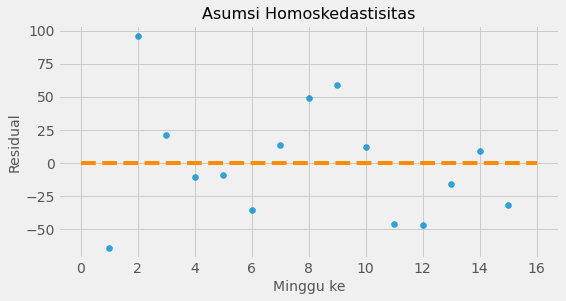

In [ ]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_pie.index, y=df_pie.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_pie.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Minggu ke', fontsize=14)
plt.title('Asumsi Homoskedastisitas', fontsize=16)
plt.show()  

Meskipun hanya memiliki 15 titik data, residu kita tampaknya memiliki varian konstan dan seragam, sehingga **kita dapat mengasumsikan bahwa model telah memenuhi asumsi homoskedastisitas.**

# Kesimpulan

Model kita berhasil melewati semua pengujian dalam langkah-langkah validasi model, sehingga kita dapat menyimpulkan bahwa model dapat bekerja dengan baik untuk memprediksi penjualan pie di masa mendatang dengan menggunakan dua variabel independen, yaitu harga dan iklan. Tapi tetap saja, model kita hanya memiliki $R^2$ sebesar 52,14%, yang berarti masih ada sekitar 48% faktor yang tidak kita diketahui yang memengaruhi penjualan pie kita.

# Referensi

1. Telkom Digital Talent Incubator - Data Scientist Modul 4 (Regression)
2. [Multiple Linear Regression and Visualization in Python](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python)
3. [Testing Linear Regression Assumptions in Python](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)